### Librerias

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

### Carga del dataset

In [7]:
data = pd.read_excel(r"C:\Users\rosar\RufoEsEterno\ProcesamientoImagenes\TF-TP\CC235-TP-TF-2025-1\data\analisis_pose_completo.xlsx", sheet_name="Sheet1", skiprows=[1, 2])
# Se usa el skiprows para saltar las filas que fueron ingresadas como descriptivas

### Muestreo de la cantidad de registros del dataset

In [8]:
len(data)

10215

### Exploracion de los primeros 5 registros

In [9]:
data.head()

,archivo,conjunto,ancho_imagen_px,alto_imagen_px,total_personas,pose_0,pose_1,pose_2,pose_3,pose_4,area_promedio_norm,ancho_promedio_norm,alto_promedio_norm,area_total_px,area_promedio_px,ancho_promedio_px,alto_promedio_px,personas_por_area_px
0,collapsed_building_image0001_0.txt,pose_info,281,288,31,4,8,8,8,3,0.001543,0.037768,0.033490,3872.001739,124.903282,10.612899,9.645166,0.000383
1,collapsed_building_image0001_1.txt,pose_info,281,288,29,6,3,8,8,4,0.001433,0.033010,0.030891,3361.990938,115.930722,9.275829,8.896558,0.000358
2,collapsed_building_image0001_2.txt,pose_info,281,288,34,10,5,7,6,6,0.003570,0.057463,0.053002,9822.998642,288.911725,16.147062,15.264695,0.000420
3,collapsed_building_image0001_3.txt,pose_info,281,288,43,10,11,5,8,9,0.002967,0.051974,0.048288,10324.014351,240.093357,14.604661,13.906984,0.000531
4,collapsed_building_image0001_4.txt,pose_info,281,288,47,8,8,12,8,11,0.003027,0.046869,0.055112,11515.017372,245.000370,13.170207,15.872360,0.000581


### Identificar si hay datos vacios

In [10]:
data.isna().sum()

archivo                 0
conjunto                0
ancho_imagen_px         0
alto_imagen_px          0
total_personas          0
pose_0                  0
pose_1                  0
pose_2                  0
pose_3                  0
pose_4                  0
area_promedio_norm      0
ancho_promedio_norm     0
alto_promedio_norm      0
area_total_px           0
area_promedio_px        0
ancho_promedio_px       0
alto_promedio_px        0
personas_por_area_px    0
dtype: int64

### Informacion de las variables

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10215 entries, 0 to 10214
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   archivo               10215 non-null  object 
 1   conjunto              10215 non-null  object 
 2   ancho_imagen_px       10215 non-null  int64  
 3   alto_imagen_px        10215 non-null  int64  
 4   total_personas        10215 non-null  int64  
 5   pose_0                10215 non-null  int64  
 6   pose_1                10215 non-null  int64  
 7   pose_2                10215 non-null  int64  
 8   pose_3                10215 non-null  int64  
 9   pose_4                10215 non-null  int64  
 10  area_promedio_norm    10215 non-null  float64
 11  ancho_promedio_norm   10215 non-null  float64
 12  alto_promedio_norm    10215 non-null  float64
 13  area_total_px         10215 non-null  float64
 14  area_promedio_px      10215 non-null  float64
 15  ancho_promedio_px  

### Descripcion de las variables numericas

In [12]:
stats = data.describe().loc[['min', 'max', 'mean', 'std']]
print(stats)

      ancho_imagen_px  alto_imagen_px  total_personas     pose_0     pose_1  \
min        123.000000      152.000000       16.000000   3.000000   3.000000   
max       5184.000000     3456.000000      240.000000  12.000000  12.000000   
mean       520.630445      447.091043       35.288008   6.677239   6.710426   
std        393.222442      278.187016       11.898676   2.645619   2.681906   

         pose_2     pose_3      pose_4  area_promedio_norm  \
min    3.000000   3.000000    3.000000            0.000007   
max   12.000000  12.000000  206.000000            0.014209   
mean   6.710817   6.665981    8.523544            0.001580   
std    2.675516   2.640015    9.656059            0.001297   

      ancho_promedio_norm  alto_promedio_norm  area_total_px  \
min              0.002045            0.002942    1093.014479   
max              0.134909            0.113700  161201.008522   
mean             0.032005            0.035481    8131.611371   
std              0.014625            

### Distribucion de poses

In [13]:
poses = ['pose_0', 'pose_1', 'pose_2', 'pose_3', 'pose_4']
pose_counts = data[poses].sum().sort_values(ascending=False)
pose_counts

pose_4    87068
pose_2    68551
pose_1    68547
pose_0    68208
pose_3    68093
dtype: int64

### Distribucion de frecuencia de las poses en un histograma

C:\Users\rosar\AppData\Local\Temp\ipykernel_11192\2485750148.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pose_counts.index, y=pose_counts.values, palette="viridis")


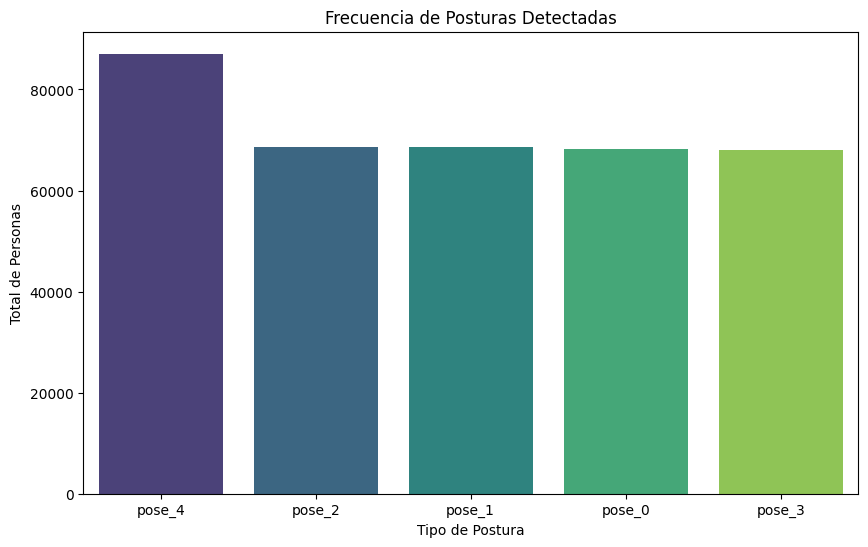

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x=pose_counts.index, y=pose_counts.values, palette="viridis")
plt.title("Frecuencia de Posturas Detectadas")
plt.xlabel("Tipo de Postura")
plt.ylabel("Total de Personas")
plt.show()

### Distribucion de personas por imagen

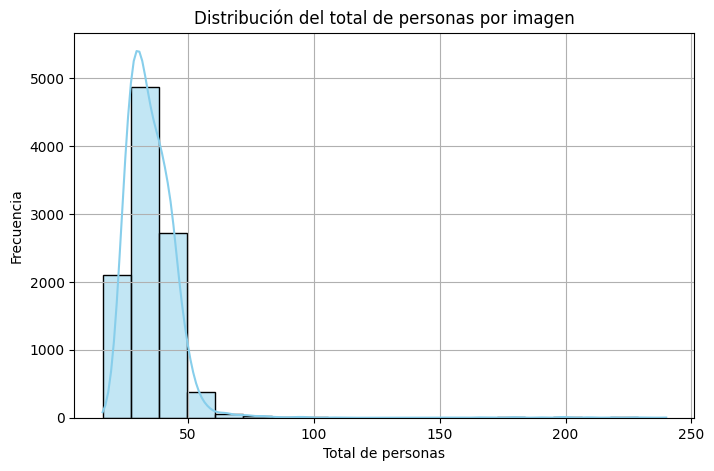

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(data['total_personas'], bins=20, kde=True, color='skyblue')
plt.title("Distribución del total de personas por imagen")
plt.xlabel("Total de personas")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

### Verificación de coincidencia entre total_personas y suma de poses


In [16]:
pose_cols = [f'pose_{i}' for i in range(5)]
data['suma_poses'] = data[pose_cols].sum(axis=1)

desajuste = (data['suma_poses'] != data['total_personas']).sum()
print(f"Número de registros donde la suma de poses NO coincide con el total de personas: {desajuste}")

porcentaje = desajuste / len(data) * 100
print(f"Equivale al {porcentaje:.2f}% del total de registros.")

Número de registros donde la suma de poses NO coincide con el total de personas: 0
Equivale al 0.00% del total de registros.


### Matriz de correlacion de las variables numericas

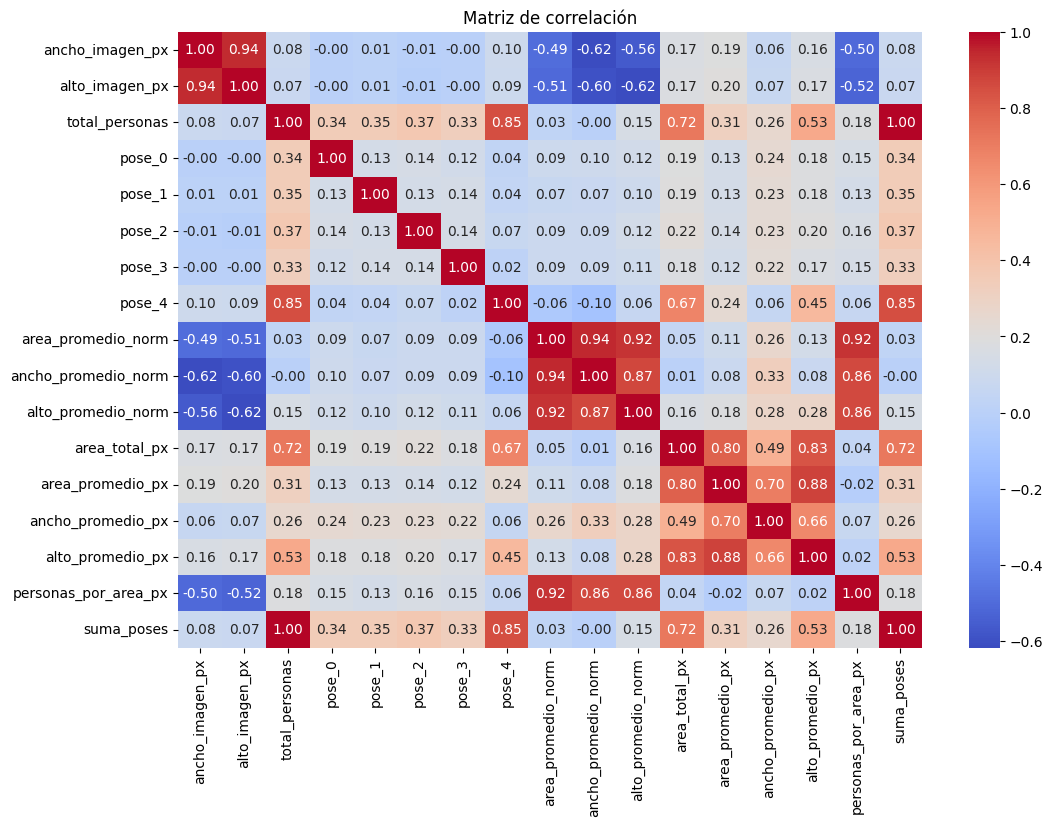

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

### Relación entre total_personas y área_total_px

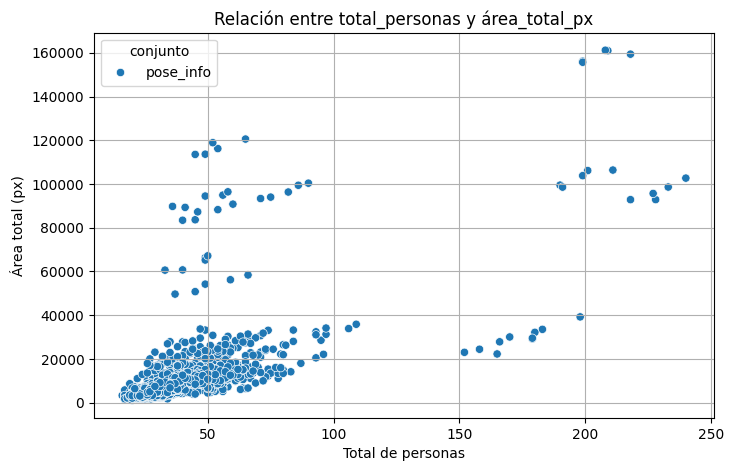

In [18]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='total_personas', y='area_total_px', data=data, hue='conjunto')
plt.title("Relación entre total_personas y área_total_px")
plt.xlabel("Total de personas")
plt.ylabel("Área total (px)")
plt.grid(True)
plt.show()